## Hotel Booking Data Analysis
**Our first task is to do the data preparation.**

Let's load the necessary libraries into enviroment.

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

Let's load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\utkri\Documents\Study\Datasets\Data Analytics\hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [3]:
df.shape

(119390, 32)

Let's check for the null values.

In [4]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Let's fill the missing value with 0. 

In [5]:
df.fillna(0,inplace=True)

Now checking for the null values.

In [6]:
sum(df.isna().sum())

0

So, all null values have been taken care of.

Next we have to analyze that there may be cases where in same row number of adults,children,babies are all zero. We need to remove these rows. First find out such cases.

In [7]:
filter_remove = (df["adults"]==0) & (df["children"]==0) & (df["babies"]==0)

In [8]:
df[filter_remove]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


So, we have 180 rows like this. We need to remove these rows. Let's use "~" negation operator to get rid of these rows.

In [9]:
df= df[~filter_remove]

In [10]:
df.shape

(119210, 32)

**Our next task is to find where do guests come from & Perform spatial analysis**.

In [11]:
df.head(7)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0.0,0.0,0,Transient,107.0,0,0,Check-Out,7/3/2015


There are 32 columns in the dataframe. But it is cureently not showing all the dataframes. Let's make all columns of the dataframe visible.

In [12]:
pd.set_option("display.max_columns",32)

In [13]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015


Let's check type of hotels.

In [14]:
df["hotel"].value_counts().reset_index()

,index,hotel
0,City Hotel,79163
1,Resort Hotel,40047


So, we have only two types of hotels. Let's separately analyze these two type of hotels for guest arrivals. Also we need to only consider those guests where reservation is not cancelled. In the 1st column we have the option to see whether reservation was cancelled or not. So, with number "0" means reservation not cancelled, but with number "1" means, reservation will cancelled. 

In [15]:
resort_hotel = df[(df["hotel"]=="Resort Hotel") & (df["is_canceled"]==0)]
city_hotel = df[(df["hotel"]=="City Hotel") & (df["is_canceled"]==0)]

In [16]:
resort_hotel.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [17]:
city_hotel.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015


In [18]:
# Checking number of rows in both hotels
print(f"Number of rows in resort_hotel is: {resort_hotel.shape[0]}")
print(f"Number of rows in city_hotel is: {city_hotel.shape[0]}")

Number of rows in resort_hotel is: 28927
Number of rows in city_hotel is: 46084


In [19]:
resort_hotel["country"].value_counts()

PRT    10184
GBR     5922
ESP     3105
IRL     1734
FRA     1399
       ...  
UGA        1
COM        1
MUS        1
BIH        1
SAU        1
Name: country, Length: 119, dtype: int64

Let's get the name of all the countries for the analysis.

In [20]:
country_list_resort = resort_hotel["country"].unique()

In [21]:
country_list_resort

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 0, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'JAM', 'HRV', 'IRN', 'CAF', 'CYP', 'NZL', 'IDN',
       'KAZ', 'THA', 'COL', 'DOM', 'MKD', 'MYS', 'NGA', 'VEN', 'GIB',
       'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR',
       'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'PHL', 'SGP', 'BDI', 'URY',
       'SAU', 'KWT', 'LBN', 'AND', 'VNM', 'AZE', 'PLW', 'ARE', 'QAT',
       'EGY', 'PER', 'SVK', 'MDV', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL',
       'UZB', 'NPL', 'BHS', 'PAK', 'MAC', 'TGO', 'TWN', 'HKG', 'DJI',
       'GEO'], dtype=object)

In [22]:
values_resort = resort_hotel["country"].value_counts()
values_resort

PRT    10184
GBR     5922
ESP     3105
IRL     1734
FRA     1399
       ...  
UGA        1
COM        1
MUS        1
BIH        1
SAU        1
Name: country, Length: 119, dtype: int64

Now let's plot the visitors using piechart.

In [23]:
import plotly.graph_objs as go
import plotly.offline as iplot
import plotly.express as px

In [24]:
from plotly.offline import download_plotlyjs,plot,iplot,init_notebook_mode
init_notebook_mode(connected=True)

In [25]:
labels=resort_hotel['country'].value_counts().index
values=resort_hotel['country'].value_counts()
fig=px.pie(resort_hotel,values=values,names=labels,title="Home country of guests",template="seaborn")

fig.update_traces(textposition="inside", textinfo="value+percent+label")

fig.show()

Similarly we can perform the same operation on one who are staying at city hotel.

**Next question is that how much do guests pay for a room per night?**

In [26]:
# Let's check the dataframe once
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [27]:
# Let's filter the data for valid room
filter_data =  df[df["is_canceled"]==0]

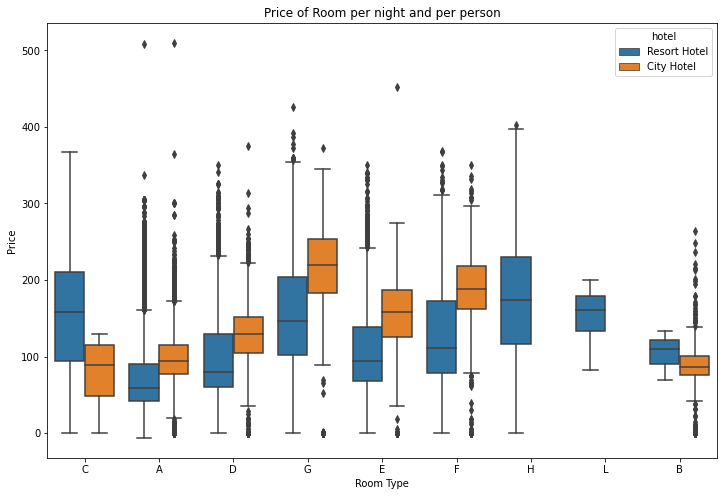

In [28]:
# Now let's plot the boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x="reserved_room_type",y="adr",data=filter_data,hue="hotel")
plt.title("Price of Room per night and per person")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

Let's separate both the types of hotels and perform operations on them.

In [29]:
resort_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [30]:
city_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015


In [31]:
data_resort=resort_hotel[resort_hotel["is_canceled"]==0]
data_city=city_hotel[city_hotel["is_canceled"]==0]

In [32]:
data_city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015


**How does the price per night vary over the year**

For this task, let's take the mean of the month's charges.

In [33]:
data_resort.groupby(["arrival_date_month"])["adr"].mean()

arrival_date_month
April         75.867816
August       181.205892
December      68.410104
February      54.147478
January       48.761125
July         150.122528
June         107.974850
March         57.056838
May           76.657558
November      48.706289
October       61.775449
September     96.416860
Name: adr, dtype: float64

Let's convert this into a dataframe.

In [34]:
resort_hotel_charges = data_resort.groupby(["arrival_date_month"])["adr"].mean().reset_index()

In [35]:
resort_hotel_charges.head()

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125


Let's perform the same operation on the city hotel.

In [36]:
city_hotel_charges = data_city.groupby("arrival_date_month")["adr"].mean().reset_index()
city_hotel_charges.head()

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983


Since the months are same on both the columns let's merge both of the dataframe.

In [37]:
final_df = pd.merge(resort_hotel_charges,city_hotel_charges,on="arrival_date_month")
final_df

,arrival_date_month,adr_x,adr_y
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


Let's modify the column names.

In [38]:
final_df.columns=["month","price_for_resort","price_for_city_hotel"]
final_df.head(6)

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019


We will sort the data frame according to the month of it.

In [39]:
## Dependency package needs to be installed
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

In [40]:
import sort_dataframeby_monthorweek as sd

In [41]:
final_df=sd.Sort_Dataframeby_Month(df=final_df,monthcolumnname='month')
final_df

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [42]:
px.line(final_df,x="month",y=["price_for_resort","price_for_city_hotel"],title='Room price per night over the Months')

So, from this it is clear that prices in Resort hotels are much higher than during the summer.

**Next task we are going to analyze that how many days people stays according to market segment and hotel type.**

In [43]:
# Let's visualize the dataframe once again
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


So, we need to access the market segment along with the column stay_in_the_week_nights. Let's plot a boxplot for this. 

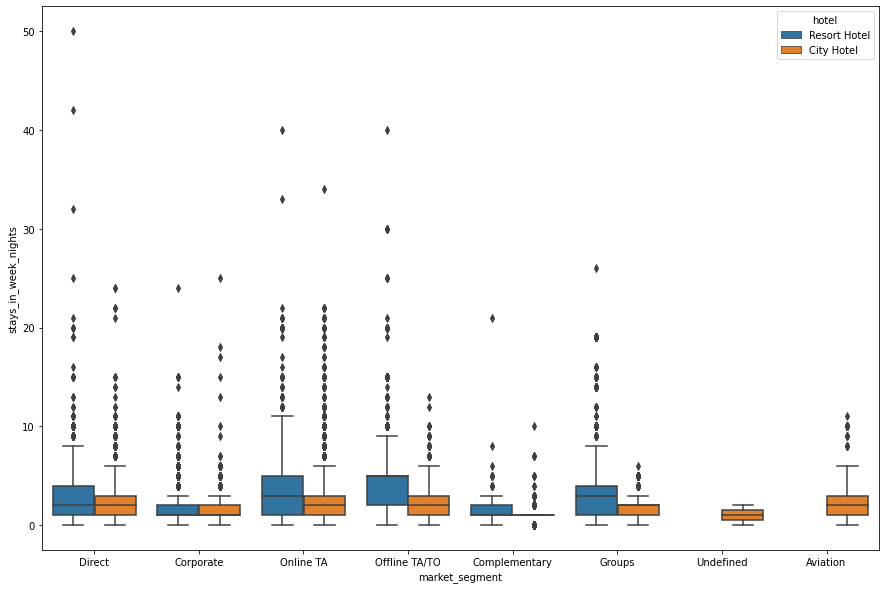

In [44]:
plt.figure(figsize = (15,10))
sns.boxplot(x="market_segment",y="stays_in_week_nights",hue="hotel",data=df)
plt.show();

So the conclusion from above chart is that it can be seen that most of the groups are normal distributed, some of them have high skewness. Looking at the distribution, most people do not seem to prefer to stay at the hotel for more than 1 week. But it seems normal to stay in resort hotels for up to 12-13 days.  <br/>
It is obvious that when people go to resort hotels, they prefer to stay more.

**Next task is to analyze the preference of guests what they like in meal.**

In [45]:
df["meal"].value_counts()

BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64

Let's plot it.

In [46]:
px.pie(data_frame=df,names=df["meal"].value_counts().index,values=df["meal"].value_counts(),hole=0.5)

**Our next task is to analyze a special request done by the customers.**

In [47]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


There is a column named <i> "total_of_special_requests" </i>. Let's use this column to find out the number of requests.

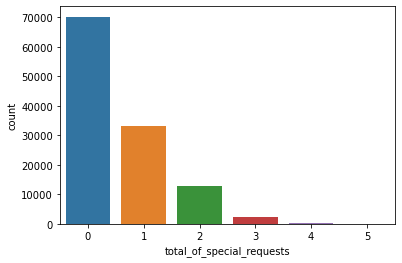

In [48]:
# Let's plot the request
sns.countplot(x=df["total_of_special_requests"])
plt.show();

So, maximum is 0 request. This means that maximum people have not made any special request.

**Our next task is to create a pivot table of relationship between special requests and cancellation of bookings**.

In [49]:
pd.crosstab(index=df["total_of_special_requests"],columns=df["is_canceled"])

is_canceled,0,1
total_of_special_requests,,
0,36667,33534
1,25867,7316
2,10086,2866
3,2049,445
4,304,36
5,38,2


Let's plot the grpah of it.

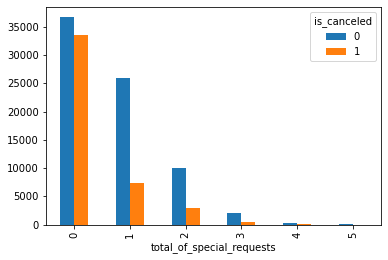

In [50]:
pivot_requests = pd.crosstab(index=df["total_of_special_requests"],columns=df["is_canceled"])
pivot_requests.plot(kind="bar");

Conclusion is that nearly half bookings without any special requests have been cancelled and another half of them have not been canceled.

**Our next task is to find out which are the most busy month or in which months guests are high?**

In [51]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [52]:
data_resort["arrival_date_month"].value_counts()

August       3257
July         3137
October      2575
March        2571
April        2550
May          2535
February     2308
September    2102
June         2037
December     2014
November     1975
January      1866
Name: arrival_date_month, dtype: int64

Let's convert this into a dataframe and give the name to the dataframe.

In [53]:
rush_resort =  data_resort["arrival_date_month"].value_counts().reset_index()
rush_resort.columns=["month","number of guests"]

In [54]:
rush_resort.head()

,month,number of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550


Let's perform the same operation on data_city.

In [55]:
data_city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015


In [56]:
rush_city = data_city["arrival_date_month"].value_counts().reset_index()
rush_city.columns=["month","number of guests"]
rush_city.head() 

,month,number of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326


Let's merge both of the dataframe.

In [57]:
final_rush = pd.merge(rush_resort,rush_city,on="month")
final_rush.columns=["month","number of guests in resort","number of guests in city hotel"]
final_rush

,month,number of guests in resort,number of guests in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


Let's sort out the column names in order as we did earlier.

In [58]:
import sort_dataframeby_monthorweek as sd

In [59]:
final_rush = sd.Sort_Dataframeby_Month(df=final_rush,monthcolumnname="month")
final_rush

,month,number of guests in resort,number of guests in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [60]:
# Let's plot it on graph
px.line(data_frame=final_rush,x="month",y=["number of guests in resort","number of guests in city hotel"],
       title="Number of guests month wise.")

The City hotel has more guests during spring and autumn, when the prices are also highest.
In July and August there are less visitors, although prices are lower.

Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.
Both hotels have the fewest guests during the winter.

**Our next task is to analyze how long do people stay at hotels?**

In [61]:
# Let's check the dataframe once.
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


For need to find that number of people that stays over the period, we need only those data where bookings were not get cancelled.

In [62]:
# So, let's separate out the data that needs to be done.
clean_df = df[df["is_canceled"]==0]
clean_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [63]:
clean_df["is_canceled"].unique()

array([0], dtype=int64)

We have two columns over here, one for the *stays_in_weekend_nights* & one is for the *stays_in_week_nights*. Let's take a sum of these and store it in a spearate column.

In [70]:
clean_df["total_nights"] = clean_df["stays_in_weekend_nights"] + clean_df["stays_in_week_nights"]

In [69]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [65]:
stay_df = clean_df.groupby(["total_nights","hotel"]).agg("count").reset_index()
stay_df.head()

,total_nights,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,City Hotel,251,251,251,251,251,251,251,251,251,251,251,251,251,251,...,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
1,0,Resort Hotel,371,371,371,371,371,371,371,371,371,371,371,371,371,371,...,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371
2,1,City Hotel,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,...,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155
3,1,Resort Hotel,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,...,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579
4,2,City Hotel,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,...,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983


So, we have got all the data according to total nights and hotel. In the above dataframe we need only 3 dataframes. So, let's use *iloc* to separate these first three columns.   

In [66]:
stay_df = stay_df.iloc[:,:3]
stay_df.head()

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


Let's plot a graph for this.

In [71]:
stay_df.rename(columns={"is_canceled":"number of stays"},inplace=True)

In [72]:
stay_df.head()

,total_nights,hotel,number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


Let's plot a graph for this.

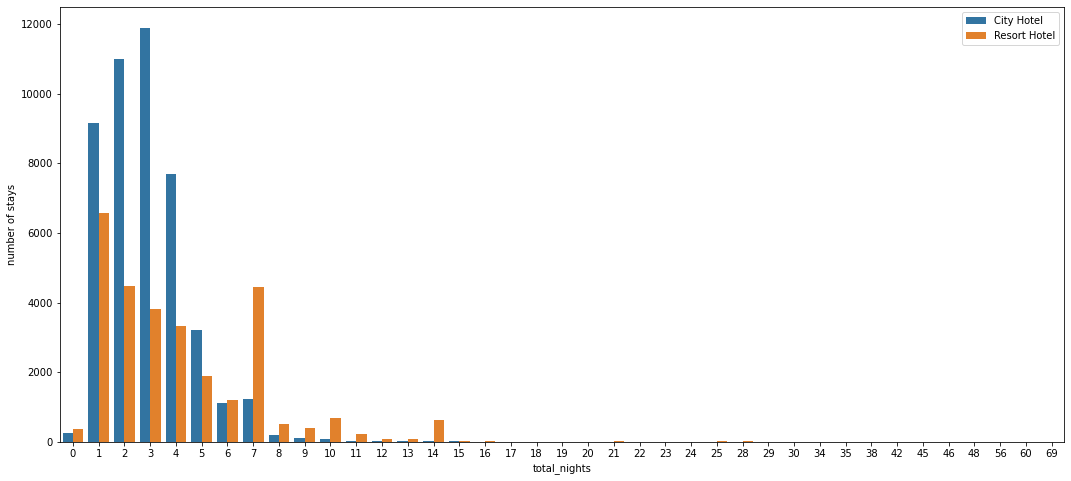

In [79]:
plt.figure(figsize=(18, 8))
sns.barplot(x = "total_nights", y = "number of stays" , hue="hotel", data=stay_df)
plt.legend(loc="upper right");

**Our next task is to analyze bookings by market segments**

In [81]:
clean_df["market_segment"].value_counts()

Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: market_segment, dtype: int64

Let's plot a pie chart for this.

In [82]:
figure =  px.pie(data_frame=clean_df,names=clean_df["market_segment"].value_counts().index,
                                  values=clean_df["market_segment"].value_counts(),
                          title="Bookings per market segment")
figure.update_traces(rotation=90,textinfo="percent+label")
figure.show()

So, online TA dominates the market.

**Our next task is to analyze the price per night(ADR) & person based on booking and room.**

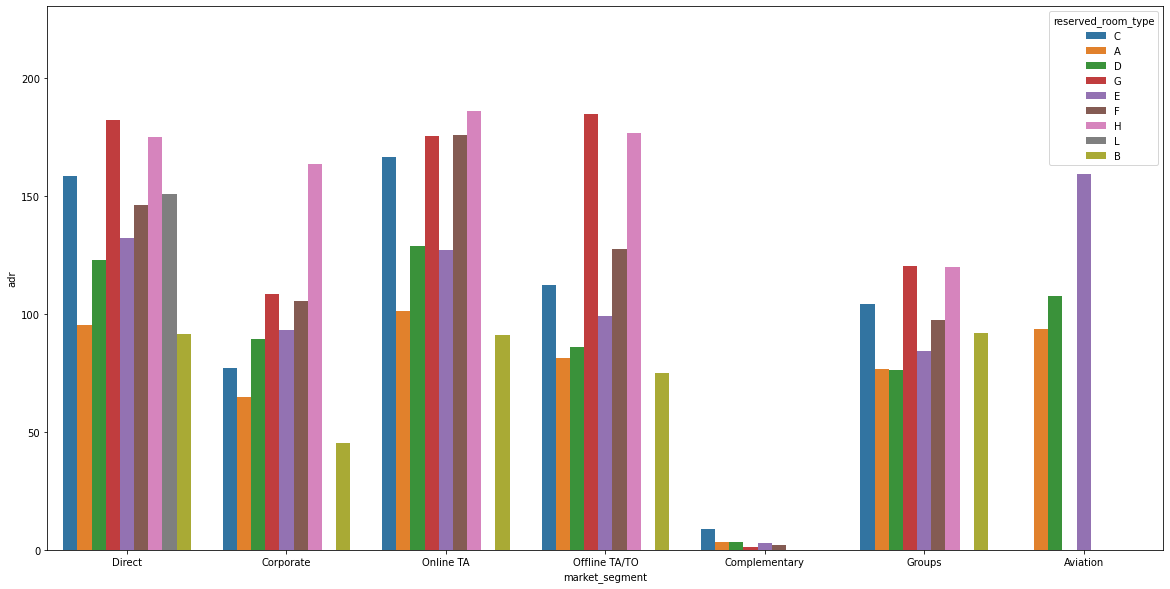

In [83]:
plt.figure(figsize=(20,10))
sns.barplot(x="market_segment",y="adr",hue="reserved_room_type",data=clean_df,errwidth=0.0);

Conclusion is "H" category room is more preferred.

**Our next task is to analyze how many bookings were cancelled**.

In [84]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [88]:
df[df["is_canceled"]==1].count()[0]

44199

So, total of 44199 bookings were cancelled. Let's find out according to hotel type. 

In [92]:
resort_cancel = df[(df["is_canceled"]==1) & (df["hotel"]=="Resort Hotel")].count()[0]

In [93]:
city_cancel = df[(df["is_canceled"]==1) & (df["hotel"]=="City Hotel")].count()[0]

In [94]:
total_cancel = resort_cancel + city_cancel

In [96]:
print(f"Total cancel bookings were {total_cancel} where resort cancel were {resort_cancel} and city hotel cancel were {city_cancel}.")

Total cancel bookings were 44199 where resort cancel were 11120 and city hotel cancel were 33079.


**Our next task is to find the which month has highest cancellation**.

In [97]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [98]:
cancel_df =  df[df["is_canceled"]==1]

In [111]:
cancel_month_data = cancel_df.groupby("arrival_date_month")["is_canceled"].agg({"count"}).reset_index()
cancel_month_data

,arrival_date_month,count
0,April,4518
1,August,5237
2,December,2368
3,February,2693
4,January,1806
5,July,4737
6,June,4534
7,March,3148
8,May,4677
9,November,2120


Let's rearrange the months and plot the graph.

In [106]:
import sort_dataframeby_monthorweek as sd

In [112]:
final_cancel_df = sd.Sort_Dataframeby_Month(df=cancel_month_data,monthcolumnname="arrival_date_month")
final_cancel_df

,arrival_date_month,count
0,January,1806
1,February,2693
2,March,3148
3,April,4518
4,May,4677
5,June,4534
6,July,4737
7,August,5237
8,September,4115
9,October,4246


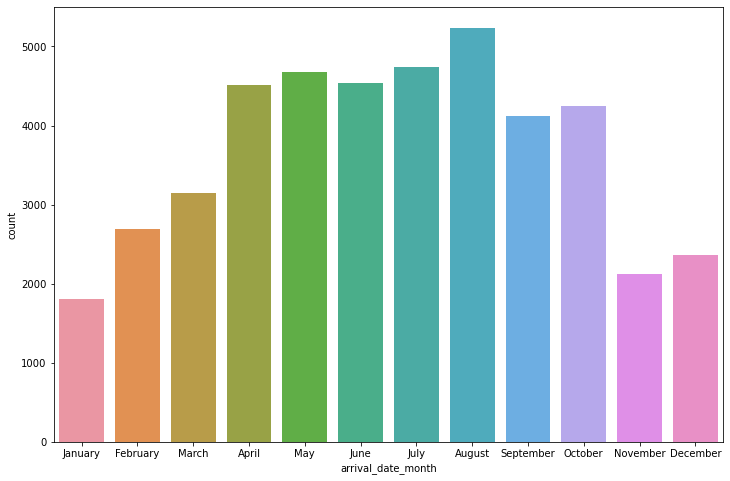

In [116]:
plt.figure(figsize=(12,8))
sns.barplot(x="arrival_date_month",y="count",data=final_cancel_df);

August has maximum number of cancellation in booking.